# Top

Here are our first approaches with graphics

**Import + dataset**

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import pylab
import seaborn as sns
sns.set()

DATASET_URL = "https://raw.githubusercontent.com/kaiyungtan/challenge-data-analysis/master/data/clean/belgium_real_estate.csv"

df = pd.DataFrame(pd.read_csv(DATASET_URL, index_col=0))
df



,postal_code,city_name,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,lattitude,longitude,province,region
0,1050,Ixelles,0,340000,6,203,1,0,1,0,95,2,0,to be done up,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
1,1050,Ixelles,0,520000,4,200,0,0,0,0,69,2,0,to renovate,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
2,1050,Ixelles,0,599000,4,160,1,0,1,1,100,2,0,to be done up,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
3,1050,Ixelles,0,599000,3,160,1,0,1,1,130,2,0,good,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
4,1050,Ixelles,0,575000,3,171,0,0,0,0,46,2,0,just renovated,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40390,1472,Vieux-Genappe,0,475000,5,216,1,1,0,0,1550,4,1,as new,4.401503,50.629025,Brabant wallon,Wallonie
40391,1472,Vieux-Genappe,0,475000,5,215,1,0,1,0,1550,0,1,good,4.401503,50.629025,Brabant wallon,Wallonie
40392,1461,Haut-Ittre,0,499000,5,275,1,0,1,1,1561,4,0,unknown,4.296472,50.648804,Brabant wallon,Wallonie
40393,1761,Borchtlombeek,0,495000,4,235,1,0,0,1,488,4,0,unknown,4.136915,50.848178,Brabant flamand,Flandre


# Basics

**BASICS MATPLOTLIB**

[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]


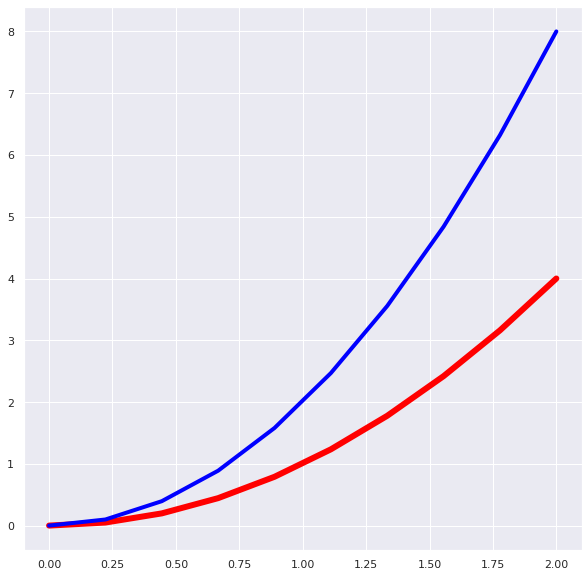

In [45]:
# Let's learning basics !
# this video help us ( in french ! ) https://www.youtube.com/watch?v=O_OeWxpnUc0&ab_channel=MachineLearnia

x = np.linspace(0,2,10)
print(x)
y = x ** 2

plt.figure(figsize=(10,10))

# param c = color, lw = linewidth, ls = style, label=name
plt.plot(x,y , c="red", lw="6")
plt.plot(x,y*2 , c="blue", lw="4")

plt.show()
# plt.scatter(x,y)

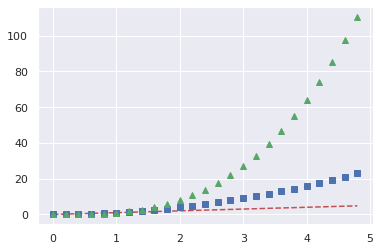

In [46]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# Visualisation

First test on data visualization

## House area on price

     house_area          price
0             5  241833.333333
1            11  185000.000000
2            13  154662.500000
3            14  107000.000000
4            15  163500.000000
..          ...            ...
480         494  743000.000000
481         495  702333.333333
482         496  765666.666667
483         498  399000.000000
484         499  600000.000000

[485 rows x 2 columns]
y=1023.468286x+(158237.845029)


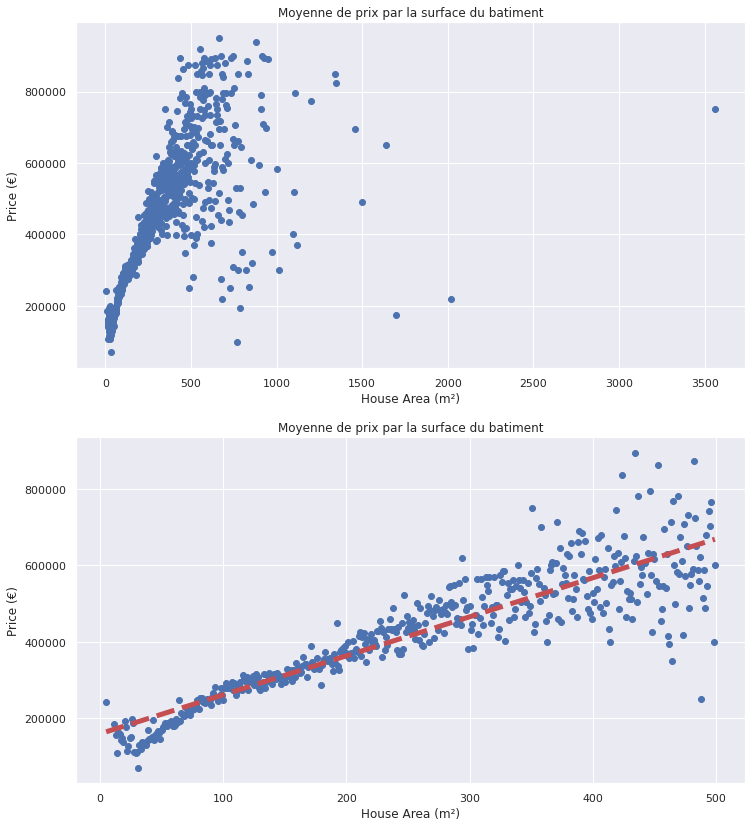

In [47]:
plt.figure(figsize=(12,14))

plt.subplot(2,1,1)

group_full = df.groupby('house_area')['price'].mean()
group = group_full.reset_index()
# print(group)

x = group['house_area']
y = group['price']
plt.title("Moyenne de prix par la surface du batiment")
plt.xlabel('House Area (m²)')
plt.ylabel('Price (€)');
plt.scatter(x, y)


plt.subplot(2,1,2)

group_full = df.groupby('house_area')['price'].mean()
group = group_full.reset_index()
group = group[group['house_area'] > 0]
group = group[group['house_area'] < 500]

print(group)

x = group['house_area']
y = group['price']
plt.title("Moyenne de prix par la surface du batiment")
plt.xlabel('House Area (m²)')
plt.ylabel('Price (€)');

# calc the trendline 
z = np.polyfit(x, y, 1) 
p = np.poly1d(z) 

# the line equation: 
print ("y=%.6fx+(%.6f)"%(z[0],z[1]) )

plt.scatter(x, y)
# plt.plot(group)
plt.plot(x,p(x),"r--", lw="5") 




## Surface of the land on price

y=144.059447x+(246529.637070)


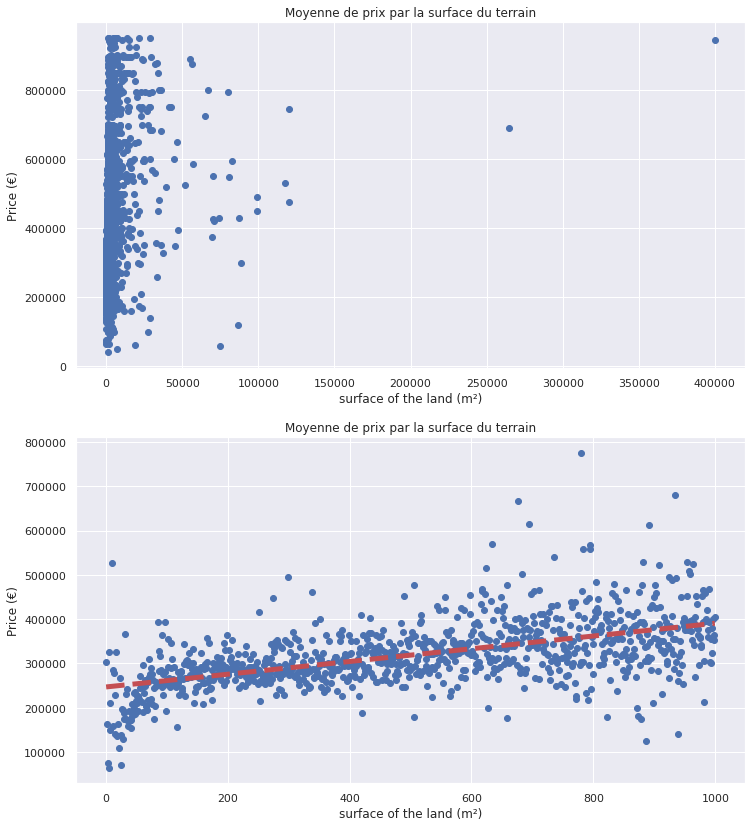

In [48]:
plt.figure(figsize=(12,14))

plt.subplot(2,1,1)
group_full = df.groupby('surface_of_the_land')['price'].mean()
group = group_full.reset_index()

x = group['surface_of_the_land']
y = group['price']
plt.title("Moyenne de prix par la surface du terrain")
plt.xlabel('surface of the land (m²)')
plt.ylabel('Price (€)');
plt.scatter(x, y)


plt.subplot(2,1,2)

group_full = df.groupby('surface_of_the_land')['price'].mean()
group = group_full.reset_index()
group = group[group['surface_of_the_land'] > 0]
group = group[group['surface_of_the_land'] < 1000]

x = group['surface_of_the_land']
y = group['price']
plt.title("Moyenne de prix par la surface du terrain")
plt.xlabel('surface of the land (m²)')
plt.ylabel('Price (€)');

# calc the trendline 
z = np.polyfit(x, y, 1) 
p = np.poly1d(z) 

# the line equation: 
print ("y=%.6fx+(%.6f)"%(z[0],z[1]) )

plt.scatter(x, y)
# plt.plot(group)
plt.plot(x,p(x),"r--", lw="5") 



(array([ 94., 100., 100., 100.,  99., 100., 100., 100., 100.,  99.]),
 array([  1. , 100.8, 200.6, 300.4, 400.2, 500. , 599.8, 699.6, 799.4,
        899.2, 999. ]),
 <a list of 10 Patch objects>)

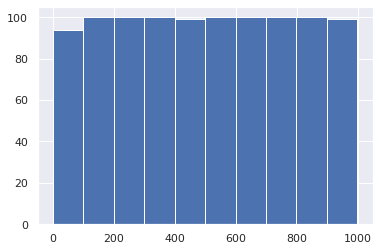

In [49]:
plt.hist(x)
# from 0 to 1000 m² the number of values is proportional


## Region on price

      region          price
0  Bruxelles  390909.573775
1    Flandre  331116.577045
2   Wallonie  257946.837473


<BarContainer object of 3 artists>

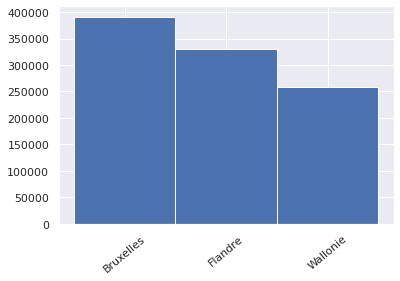

In [50]:
group_full = df.groupby('region')['price'].mean()
group = group_full.reset_index()

print(group)

h = group['price']
abs = [1,2,3]
width = 1.0

BarName = ['Bruxelles','Flandre','Wallonie']
pylab.xticks(abs, BarName, rotation=40)

plt.bar(abs, h, width, color='b' )

## number of rooms on type of property

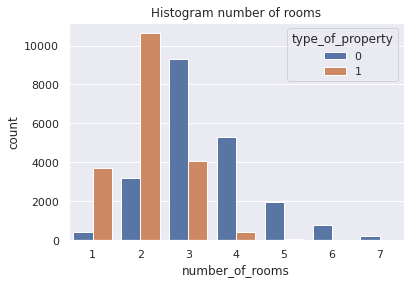

In [51]:
plt.figure()

x = df[df['number_of_rooms'] < 8]
x = x['number_of_rooms']

plt.title("Histogram number of rooms")
plt.xlabel('number_of_rooms')
plt.ylabel('entries');

# plt.hist(x)
sns.countplot(x, hue=df['type_of_property'])

## other

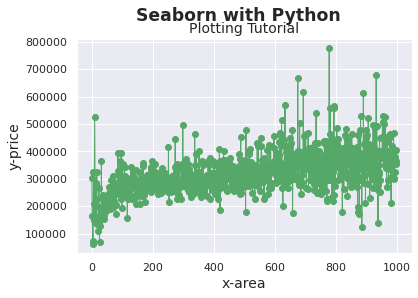

In [57]:
# let's try seaborn !

import seaborn as sns
sns.set()
group_full = df.groupby('surface_of_the_land')['price'].mean()
group = group_full.reset_index()
group = group[group['surface_of_the_land'] > 0]
group = group[group['surface_of_the_land'] < 1000]

x = group['surface_of_the_land']
y = group['price']

fig = plt.figure()
fig.suptitle('Seaborn with Python', fontsize='x-large', fontweight='bold')
fig.subplots_adjust(top=0.87)

ax = fig.add_subplot(111)

fontdict={'fontsize': 14,
        'fontweight' : 'book',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}

ax.set_title('Plotting Tutorial', fontdict=fontdict)

plt.plot(x, y, 'go-', linewidth=1) #linewidth=1 to make it narrower
plt.xlabel('x-area', fontsize=14)
plt.ylabel('y-price', fontsize=14);

In [56]:
df['price_sqm'] = df['price'] / df['house_area']

# most & less expensive municipalities in Belgium by average price/square meter

print(df.groupby('city_name')['price_sqm'].agg('mean').sort_values() )
 
filt = df['city_name'] == 'Beauwelz'

df[filt]

city_name
Beauwelz         350.000000
Focant           390.243902
Nollevaux        421.212121
Attre            560.424679
Roucourt         657.142857
                   ...     
Heverlee        4148.311309
Leuven          4600.957816
Ramskapelle     4697.122149
Knokke          5924.335983
Westouter      19671.523810
Name: price_sqm, Length: 1046, dtype: float64


,postal_code,city_name,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,lattitude,longitude,province,region,price_sqm
40044,6594,Beauwelz,0,70000,3,200,0,0,0,0,4000,4,0,unknown,4.156972,50.015365,Hainaut,Wallonie,350.0
